In [47]:
from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
import numpy as np
from scipy.sparse.csgraph import laplacian
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [71]:
x,y = datasets.make_moons(n_samples=50)
adj_mat = kneighbors_graph(x,n_neighbors=3,include_self=False)
# print (adj_mat.toarray())

In [27]:
adj_dense = adj_mat.toarray()
print adj_mat.format
print(laplacian(adj_mat.T).toarray()).T
print ('\n')
print (np.diag(adj_mat.dot(np.ones(adj_mat.shape[0])))-adj_mat)
print '\n',laplacian(adj_dense.T)

csr
[[ 3. -1. -1.  0. -1.]
 [-1.  3. -1.  0. -1.]
 [ 0. -1.  3. -1. -1.]
 [ 0. -1. -1.  3. -1.]
 [-1. -1. -1.  0.  3.]]


[[ 3. -1. -1.  0. -1.]
 [-1.  3. -1.  0. -1.]
 [ 0. -1.  3. -1. -1.]
 [ 0. -1. -1.  3. -1.]
 [-1. -1. -1.  0.  3.]]

[[ 3. -1. -0. -0. -1.]
 [-1.  3. -1. -1. -1.]
 [-1. -1.  3. -1. -1.]
 [-0. -0. -1.  3. -0.]
 [-1. -1. -1. -1.  3.]]


In [167]:
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
from scipy.sparse import csr_matrix

In [187]:
x,y = datasets.make_moons(n_samples=500)
adj_mat = kneighbors_graph(x,n_neighbors=20,include_self=False)
adj_mat=0.5*(adj_mat+adj_mat.T)
scipy_laplacia = laplacian(adj_mat,normed=False)
my_laplacian = np.diag(adj_mat.dot(np.ones(adj_mat.shape[0])))-adj_mat
print np.allclose(scipy_laplacia.toarray(),my_laplacian)
eig,emb = eigsh(scipy_laplacia,k=2,sigma=1.0)
myeig,myemb = eigsh(csr_matrix(my_laplacian),k=2)
# print myemb,'\n',emb

True


In [180]:
print myemb.shape
from sklearn.cluster import KMeans,SpectralClustering
clf = KMeans(n_clusters=2,n_init=10)
y_pred = clf.fit_predict(emb)
my_y_pred = clf.fit_predict(myemb)
spclf=SpectralClustering(affinity='nearest_neighbors',n_clusters=2,n_neighbors=3)
sklearn_y_pred = spclf.fit_predict(x)

(50, 2)


(50, 2) (50,)


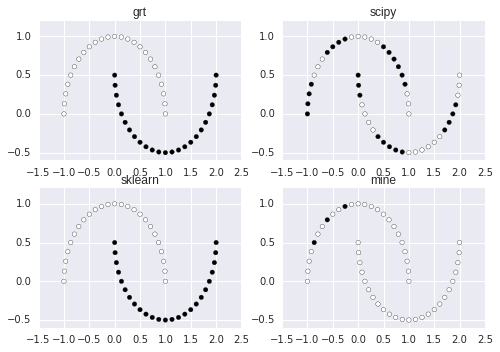

In [178]:
print x.shape,y.shape
plt.subplot(2,2,1)
plt.title("grt")
plt.scatter(x[:,0],x[:,1],c=y)
plt.subplot(2,2,2)
plt.title("scipy")
plt.scatter(x[:,0],x[:,1],c=y_pred)
plt.subplot(2,2,3)
plt.title("sklearn")
plt.scatter(x[:,0],x[:,1],c=sklearn_y_pred)
plt.subplot(2,2,4)
plt.title("mine")
plt.scatter(x[:,0],x[:,1],c=my_y_pred)

In [148]:
# print ,'\n'
np.allclose(adj_mat.toarray(),spclf.affinity_matrix_.toarray())




True

In [150]:
from sklearn.utils.graph import graph_laplacian
print
print '\n'
print 
print '\n'
print np.allclose(np.diag(adj_mat.dot(np.ones(adj_mat.shape[0])))-adj_mat, graph_laplacian(adj_mat).toarray())







True


In [182]:
from sklearn.manifold import spectral_embedding
maps = spectral_embedding(adj_mat,n_components=2,eigen_solver='arpack')

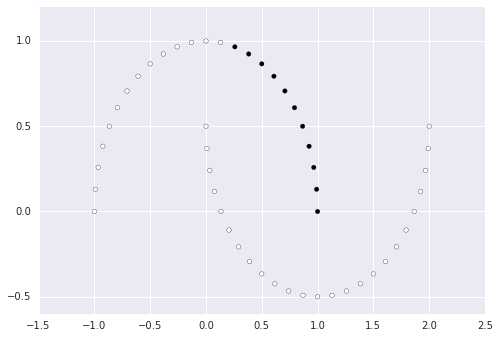

In [183]:
spclf=SpectralClustering(affinity="precomputed",n_clusters=2,n_neighbors=3)
sklearn_y_pred = spclf.fit_predict(adj_mat)
clf = KMeans(n_clusters=2,n_init=10)
r=clf.fit_predict(maps)
plt.scatter(x[:,0],x[:,1],c=r)